In [1]:
# Testing the Basic Python implementation of wordfish

In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
library(quanteda)
library(quanteda.textmodels)

library(tidyverse)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Package version: 4.3.1
Unicode version: 14.0
ICU version: 70.1
Parallel computing: 8 of 8 threads used.
See https://quanteda.io for tutorials and examples.


In [4]:
%%R
# In this example, we show how to apply Wordfish to the Irish budget speeches from 2010. First, we create a document-feature matrix. Afterwards, we run Wordfish.
dfm <- data_corpus_irishbudget2010 %>% 
  tokens(remove_punct = TRUE) %>% 
  dfm()

In [5]:
%%R
df <- convert(dfm, to = "data.frame")
df <- as_tibble(rownames_to_column(df, "Id"))

cols <- colnames(df)
vocab <- cols[3:length(cols)]

In [6]:
%R -o df,cols,vocab

In [7]:
df

,Id,doc_id,when,i,presented,the,supplementary,budget,to,this,...,shelf,campaigning,demonstrations,forms,protest,founded,livelihood,instil,reject,politically
1,1,"Lenihan, Brian (FF)",5.0,73.0,1.0,539.0,7.0,23.0,305.0,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,"Bruton, Richard (FG)",2.0,6.0,0.0,305.0,0.0,27.0,172.0,55.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,"Burton, Joan (LAB)",11.0,40.0,0.0,428.0,0.0,37.0,157.0,53.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,"Morgan, Arthur (SF)",21.0,26.0,0.0,501.0,1.0,26.0,204.0,85.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,"Cowen, Brian (FF)",4.0,17.0,0.0,394.0,0.0,21.0,209.0,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6,"Kenny, Enda (FG)",12.0,25.0,1.0,304.0,1.0,23.0,119.0,47.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7,"ODonnell, Kieran (FG)",5.0,11.0,0.0,193.0,0.0,21.0,68.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8,"Gilmore, Eamon (LAB)",6.0,10.0,0.0,270.0,0.0,27.0,98.0,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,9,"Higgins, Michael (LAB)",3.0,7.0,0.0,78.0,0.0,1.0,31.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,10,"Quinn, Ruairi (LAB)",5.0,19.0,0.0,80.0,0.0,1.0,47.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
from wordfish import Wordfish

In [9]:
import warnings
warnings.simplefilter('ignore')

In [10]:
word_doc_matrix = df.iloc[:, 2:].values
doc_names = df["doc_id"].tolist()
word_names = df.columns[2:].tolist()

results = Wordfish().fit(
    word_doc_matrix,
    dir_docs=(6, 5),
    doc_names=doc_names,
    word_names=word_names,
)

WORDFISH (Python Implementation)
Number of unique words: 5128
Number of documents: 14
Tolerance criterion: 1e-07
Identification: Omegas identified with mean 0, st.dev. 1
Performing mean 0 sd 1 starting value calc
Performing mean 0 sd 1 EM algorithm
Iteration 1
	Updating alpha and omega..
	Updating psi and beta..
	Convergence of LL: 500.0
Iteration 2
	Updating alpha and omega..
	Updating psi and beta..
	Convergence of LL: 0.004161920936864149
Iteration 3
	Updating alpha and omega..
	Updating psi and beta..
	Convergence of LL: 0.0013946091464969764
Iteration 4
	Updating alpha and omega..
	Updating psi and beta..
	Convergence of LL: 0.001680290338723867
Iteration 5
	Updating alpha and omega..
	Updating psi and beta..
	Convergence of LL: 0.0032333343042666484
Iteration 6
	Updating alpha and omega..
	Updating psi and beta..
	Convergence of LL: 0.005513085548761608
Iteration 7
	Updating alpha and omega..
	Updating psi and beta..
	Convergence of LL: 0.00805193175753817
Iteration 8
	Updating a

In [11]:
results.estimation_info

{'n_words': 5128,
 'n_documents': 14,
 'iterations': 23,
 'log_likelihood': 58449.331006663146,
 'convergence_criterion': 1e-07,
 'final_diff': 0.007998053082895801}

In [12]:
import pandas as pd

In [13]:
df_doc = pd.DataFrame(results.documents)
df_doc.index = results.doc_names
df_doc.columns = ["omega", "alpha"]

In [14]:
df_doc.sort_values(by=["omega"])

,omega,alpha
"Cowen, Brian (FF)",-1.928028,-0.464865
"Lenihan, Brian (FF)",-1.708108,0.000000
"Gormley, John (Green)",-1.248700,-1.904703
"Cuffe, Ciaran (Green)",-0.853360,-1.528333
"Ryan, Eamon (Green)",-0.294547,-1.027805
"Morgan, Arthur (SF)",0.151239,0.573669
"OCaolain, Caoimhghin (SF)",0.244931,0.036303
"ODonnell, Kieran (FG)",0.472167,-0.485049
"Bruton, Richard (FG)",0.595661,0.206910
"Gilmore, Eamon (LAB)",0.682116,0.152037


In [15]:
df_doc.reset_index(names=["doc_id"], inplace=True)

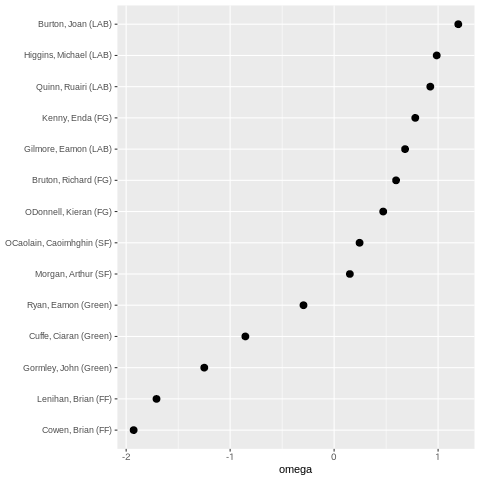

In [16]:
%%R -i df_doc
(
    ggplot(
        data=df_doc,
        mapping=aes(x=omega, y=reorder(doc_id, omega))
    )
    + geom_point(size=3)
    + labs(y = NULL)
)

In [17]:
df_word = pd.DataFrame(results.words)
df_word.columns = ["beta", "psi"]
df_word.index = results.word_names

In [18]:
df_word.sort_values(by=["beta"]).iloc[:20]

,beta,psi
dividend,-4.646921,-7.163914
productivity,-4.214240,-6.550842
sharply,-3.746209,-5.917756
phase,-3.702434,-5.432473
revenues,-3.249049,-5.302358
inevitably,-3.249049,-5.302358
renewal,-3.249049,-5.302358
prioritising,-3.249049,-5.302358
innovation,-3.033858,-3.615133
october,-2.933511,-4.446657


In [19]:
df_word.sort_values(by=["beta"], ascending=False).iloc[:20]

,beta,psi
medicine,4.772315,-4.972485
gang,4.772315,-4.972485
sharing,4.772315,-4.972485
post,4.407459,-4.801508
bailout,4.407459,-4.801508
game,3.953628,-4.608048
one's,3.953628,-4.608048
awful,3.953628,-4.608048
apprentices,3.953628,-4.608048
trolley,3.953628,-4.608048
